## EDA and Data Cleaning

### EDA
#### Import Modules

In [1]:
# -------------------------------------------------------------------------------------  import modules -------------------------------------------------------------------------------
from Functions import *
from Modules   import *

pd.set_option('display.max_columns', None)    # To view all columns 
# -------------------------------------------------------------------

df = pd.read_csv('..\\Data\\data_train.csv')
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1257897600,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,MANUAL,1.0,Alloy,35547,OTHER ASIAN,MEDIUM,OTHER,6079.0,7322.0,7065.0,8408.0,5669.0,6807.0,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,1231286400,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,AUTO,2.0,Covers,72131,OTHER ASIAN,MEDIUM,OTHER,4219.0,4809.0,5057.0,5694.0,4377.0,5072.0,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,1288656000,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,AUTO,1.0,Alloy,77113,AMERICAN,COMPACT,GM,5293.0,6668.0,8685.0,10348.0,5084.0,6014.0,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,0,1236124800,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,AUTO,2.0,Covers,76202,AMERICAN,VAN,GM,3127.0,3764.0,3877.0,4565.0,3542.0,4468.0,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,0,1248307200,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,AUTO,1.0,Alloy,72653,AMERICAN,VAN,CHRYSLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623


#### Convert Unix timestamp in 'PurchDate' to conventional time

In [2]:
df.loc[:, 'PurchDate'] = pd.to_datetime(df.loc[:, 'PurchDate'], unit='s')

print('df shape is:', df.shape, '\n', '-- '*35)
display(df.head(3))
print('\n', '-- '*35)
df.info()

df shape is: (65620, 33) 
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2009-11-11,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,MANUAL,1.0,Alloy,35547,OTHER ASIAN,MEDIUM,OTHER,6079.0,7322.0,7065.0,8408.0,5669.0,6807.0,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,2009-01-07,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,AUTO,2.0,Covers,72131,OTHER ASIAN,MEDIUM,OTHER,4219.0,4809.0,5057.0,5694.0,4377.0,5072.0,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,2010-11-02,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,AUTO,1.0,Alloy,77113,AMERICAN,COMPACT,GM,5293.0,6668.0,8685.0,10348.0,5084.0,6014.0,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803



 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9

#### Chjecking for dublicates in df

In [3]:
# There are no dublicates in the data

print('There are no dublicates in the data')
df[df.duplicated()].shape

There are no dublicates in the data


(0, 33)

#### Convert categorical nominal features to categorical

In [4]:
# Defining VNZIP1 as str in order to trim to the first 2 digits only
columns_to_convert = {'VehYear'     : 'category', 
                      'VehicleAge'  : 'category', 
                      'IsOnlineSale': 'category', 
                      'BYRNO'       : 'category',
                      'WheelTypeID' : 'category', 
                      'VNZIP1'      : 'str'}
df = df.astype(columns_to_convert)

#### Elements in every categorical feature of the Dataframe

In [5]:
pd.set_option('display.max_colwidth', None)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

unique_couts  = df.select_dtypes(include = ['object', 'category']).nunique()
unique_values = [list(df[col].unique()) for col in df.select_dtypes(include = ['object', 'category']).columns]

print('\n', 'Elements in every categorical feature of the Dataframe')
print('-- '*20)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

pd.DataFrame({'Unique counts' : unique_couts, 
              'Unique_values' : unique_values})



 Elements in every categorical feature of the Dataframe
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


,Unique counts,Unique_values
Auction,3,"[OTHER, ADESA, MANHEIM]"
VehYear,10,"[2007, 2005, 2006, 2004, 2002, 2003, 2008, 2009, 2001, 2010]"
VehicleAge,10,"[2, 4, 5, 3, 6, 7, 8, 1, 9, 0]"
Make,29,"[KIA, SUZUKI, CHEVROLET, CHRYSLER, NISSAN, MITSUBISHI, DODGE, PONTIAC, HONDA, FORD, MERCURY, SATURN, GMC, MAZDA, JEEP, HYUNDAI, BUICK, SCION, OLDSMOBILE, TOYOTA, INFINITI, ISUZU, MINI, LINCOLN, VOLVO, VOLKSWAGEN, SUBARU, ACURA, LEXUS]"
Model,1029,"[SPECTRA, FORENZA 2.0L I4 EFI, COBALT, VENTURE FWD V6 3.4L, TOWN & COUNTRY 2WD V, XTERRA 2WD V6 3.3L V, GALANT 4C 2.4L I4 EF, CHARGER 3.5L V6 EFI, COLORADO PICKUP 2WD, GRAND AM V6, MALIBU V6 3.5L V6 SF, MALIBU 4C, ACCORD 4C, TRAILBLAZER 4WD 6C 4, IMPALA, FOCUS, ALTIMA 2.5L I4 MPI /, STRATUS 4C, 1500 RAM PICKUP 2WD, 300 2.7L V6 MPI, MALIBU 4C 2.2L I4 MP, SPECTRA 2.0L I4 EFI, SPECTRA 2.0L I-4 EFI, SORENTO 2WD, CARAVAN GRAND FWD V6, STRATUS V6 2.7L V6 M, CR-V 2WD, MILAN 4C, GRAND AM 4C 2.2L I4, ION, PT CRUISER, GRAND PRIX 3.8L V6 S, FRONTIER PICKUP 2WD, EQUINOX AWD V6 3.4L, AVEO, FOCUS 2.0L I4 SFI, PACIFICA AWD 4.0L V6, FIVE HUNDRED, AVENGER 4C, MARINER 4WD V6 3.0L, TRAILBLAZER 2WD 6C, RIO, GRAND PRIX, TAURUS, IMPALA 3.5L V6 SFI, CHARGER V6 2.7L V6 M, MUSTANG V6 4.0L V6 E, 1500 SIERRA PICKUP 4, ENVOY 2WD 6C 4.2L I-, RENO 2.0L I4 EFI, TRAILBLAZER EXT 4WD, CHARGER 2.7L V6 MPI, 1500 SIERRA PICKUP 2, PT CRUISER 2.4L I4 S, FORENZA, MAXIMA 3.5L V6 MPI, B3000 PICKUP 2WD V6, CARAVAN FWD V6, FREESTAR FWD V6 3.9L, G6 4C, PACIFICA FWD, TOWN & COUNTRY FWD V, IMPALA V6, EQUINOX FWD V6 3.4L, ACCORD 4C 2.4L I-4 M, AURA V6, FIVE HUNDRED 3.0L V6, CALIBER, NEON, MOUNTAINEER AWD V6, MAZDA6, VUE 2WD 4C, TRAILBLAZER 4WD 6C, EXPLORER 4WD V6, HHR 2.4L I-4 MPI, TAURUS 3.0L V6 EFI, ION 2.2L I4 EFI, PATRIOT FWD 4C, SONATA 4C, SONATA V6, STRATUS 4C 2.4L I4 S, G6 V6, ELANTRA 2.0L I4 MPI, ESCAPE 2WD 4C, ELANTRA, AVENGER V6, SORENTO 2WD 3.5L V6, CENTURY V6, CARAVAN FWD V6 3.3L, TRAILBLAZER 2WD 6C 4, LUCERNE V6 3.8L V6 S, ESCORT 2.0L I-4 EFI, STRATUS V6, SEBRING 4C 2.4L I4 S, XA, ELEMENT 4WD 2.4L I4, SEBRING V6, CHARGER V6, SEBRING 4C 2.4L I4 E, ION 2.2L I4 EFI / SF, ...]"
Trim,134,"[nan, EX, LT, LS, Bas, SE, DE, LX, SXT, SLT, SX, 2, Tou, ZX4, SEL, GT, Cla, SL, SLE, Spo, W/T, ZX5, Lim, DS, XE, i, XLT, 3, GLS, Cus, CX, ZX2, GL, Nor, Lar, SES, S, ES, 1, STX, ST, Edg, SL2, Adv, SC1, Lux, L20, ZX3, LE, 150, s, XLS, Edd, XL, CXL, GS, L30, GTC, Sta, LXi, SVT, Sig, T5, CE, SV6, LW2, Pre, VP, Ren, GXE, ZTS, OZ, SS, C, SL1, R/T, GTP, Her, Hig, FX4, Ent, Z71, LL, Hyb, RS, SR5, LTZ, Den, ZXW, Pro, Plu, Val, Max, LW3, X, Car, RT, Ult, DX, GLE, ...]"
SubModel,840,"[4D SEDAN EX, 4D WAGON, 2D COUPE LT, PASSENGER 3.4L, MINIVAN 3.3L, 4D SPORT UTILITY, 4D SEDAN DE, 4D SEDAN, CREW CAB 2.8L, 4D SEDAN SE1, 4D SEDAN LS, 4D SEDAN LT, 4D SEDAN LX AUTO, 4D SUV 4.2L LS, 4D SEDAN SE, QUAD CAB 4.7L FFV SLT, 4D SPORT UTILITY EX, 4D SEDAN SXT FFV, 4D SPORT UTILITY LX, 4D SEDAN LEVEL 2, EXT CAB 2.4L XE, 4D SUV LT, 4D SEDAN ZX4, 4D SPORT TOURING, 4D SEDAN SEL, 4D SEDAN S, 4D SEDAN GT, 4D SUV 3.0L PREMIER, 4D SUV 4.2L, 4D SEDAN CLASSIC, 4D SEDAN EX AUTO, 4D SEDAN 2.7L, 2D COUPE, EXT CAB 5.3L SL, 4D UTILITY 4.2L SLE, EXT MINIVAN 3.3L LX, MINIVAN 3.3L FFV SPORT, REG CAB 4.3L SLE, 4D HATCHBACK ZX5 SE, 4D SEDAN SL, 4D SEDAN LIMITED, 2D EXT CAB 3.0L DUAL SPORT FFV, MINIVAN 3.3L FFV SXT, PASSENGER 3.9L SE, 4D SPORT TOURER, MINIVAN 3.8L, 4D SEDAN LS 3.5L FFV, 4D SUV LS, 4D SEDAN XE, 4D WAGON SXT, 4D SUV 4.0L, 4D SEDAN I, 4D CUV 2.2L, 4D SUV 4.0L FFV XLT, REG CAB 3.5L LS, 4D SUV 2.2L 1LT, 4D SEDAN LEVEL 3, 4D SUV SPORT, 4D SEDAN GLS, 4D SPORT, 4D SEDAN LT 3.5L, 4D CUV 3.0L XLT, 4D SEDAN CUSTOM, 4D SEDAN CX, 2D COUPE ZX2, 4D HATCHBACK, 4D SEDAN 3.5L, REG CAB 5.3L, 4D SEDAN GL2, CREW CAB 5.4L LARIAT, MINIVAN 3.3L SPORT, 4D WAGON LAREDO, 4D SEDAN SES, PASSENGER EXT 3.5L, 4D CUV 2.7L GLS, 4D SEDAN 1.8, 4D SPORT UTILITY I, 4D SPORT UTILITY SE, 4D SUV 5.4L XLT, 4D PASSENGER 3.8L SE, REG CAB 3.7L SXT, 4D SEDAN LT 3.9L, 4D SEDAN LEVEL 1, EXT CAB 4.6L XL, 4D SUV 4.7L, REG CA

#### Distribution of Good and Bad Buys in df

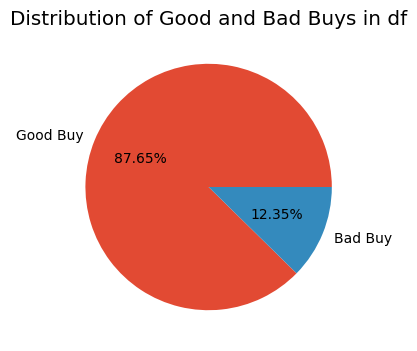

In [6]:
fig, ax = plt.subplots(figsize = [4,4])
plt.style.use('ggplot')
# ----------------------------------------------------------

target_distribution = pd.crosstab(index     = df['IsBadBuy'], 
                                  columns   = 'count', 
                                  normalize = True)

target_distribution.plot(kind    = 'pie', 
                         y       = 'count', 
                         labels  = ['Good Buy', 'Bad Buy'],
                         autopct = '%.2f%%',
                         legend  = False,
                         ax     = ax)

ax.set_title('Distribution of Good and Bad Buys in df')
ax.set_ylabel('');

#### Pair Plot

In [7]:
# plt.style.use('ggplot')
# # -- -- -- -- -- -- -- -- -- -- 

# sns.pairplot(data   = df,    
#              corner = True, 
#              hue    = 'IsBadBuy'
#              );

#### Plotting the distribution of categorical features in original Dataframe 

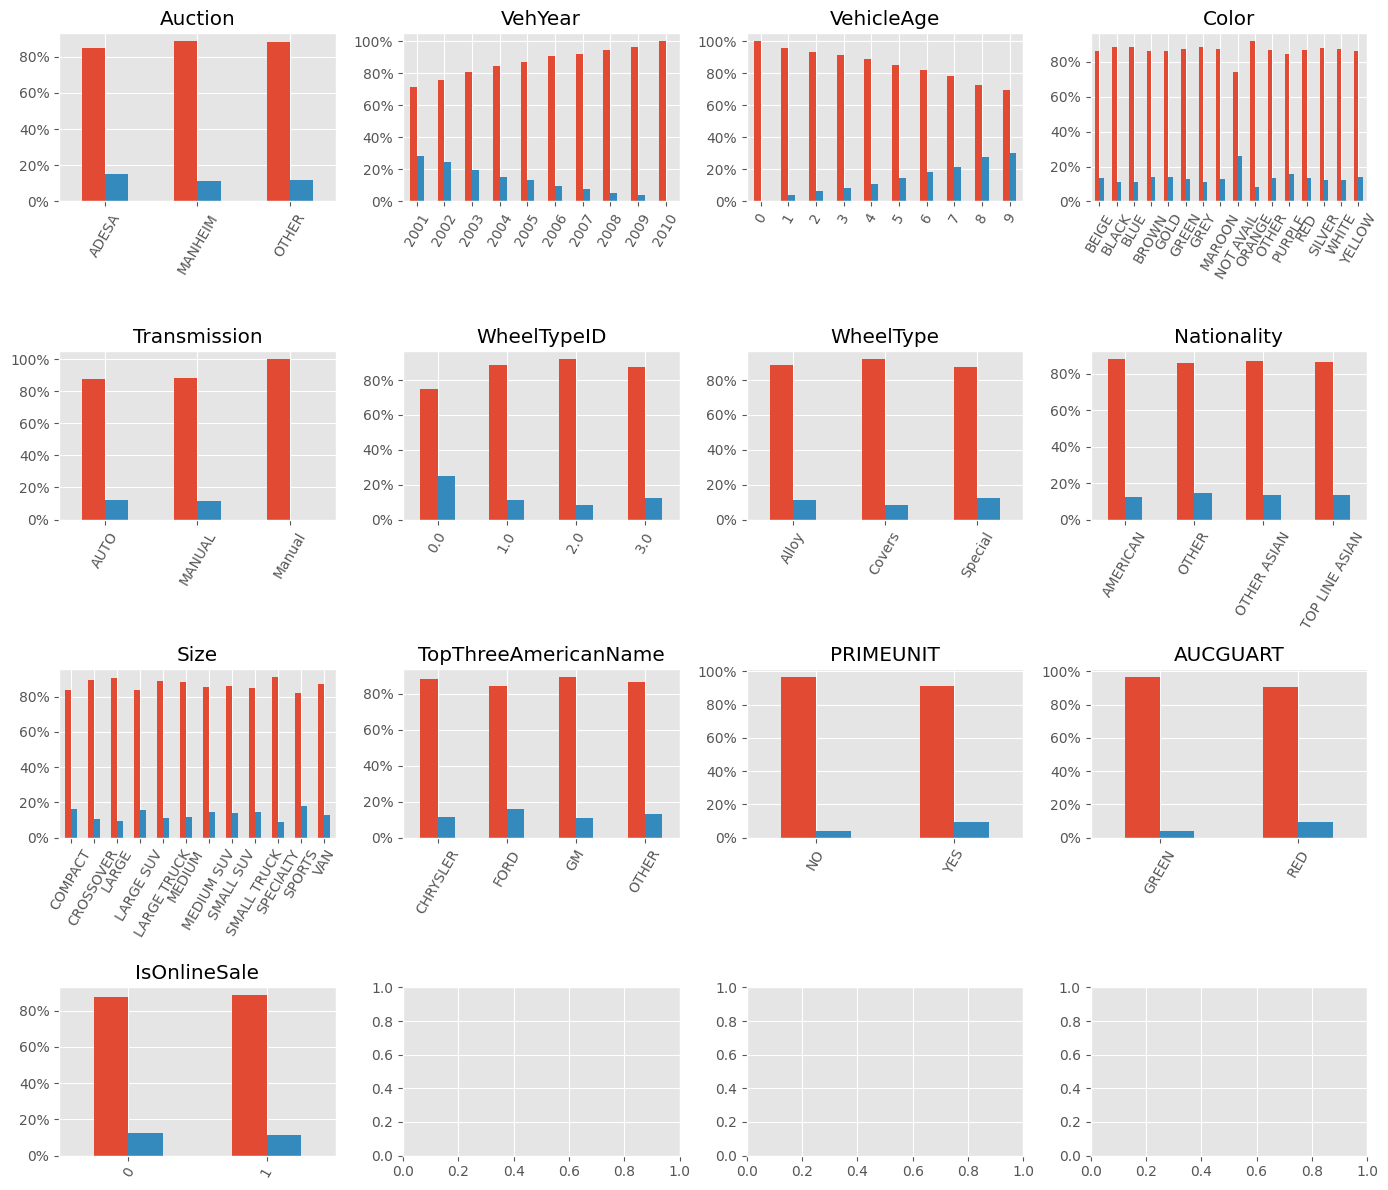

In [8]:
# categorical_distribution(df, num_cols, num_unique, figsize)
categorical_distribution(df, 4, 17, (14,12))

#### Correlation among numerical variables 

In [9]:
df.drop('IsBadBuy', axis = 1).corr(numeric_only = True)

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
VehOdo,1.000000,-0.017089,0.024335,0.031122,0.062733,-0.028015,0.012478,0.016564,0.048444,-0.059555,0.412299
MMRAcquisitionAuctionAveragePrice,-0.017089,1.000000,0.990356,0.910186,0.909916,0.937882,0.932402,0.871838,0.870958,0.789630,-0.050998
MMRAcquisitionAuctionCleanPrice,0.024335,0.990356,1.000000,0.902518,0.917943,0.923702,0.932022,0.860877,0.871171,0.781325,-0.021391
MMRAcquisitionRetailAveragePrice,0.031122,0.910186,0.902518,1.000000,0.990206,0.851547,0.849155,0.913338,0.906121,0.745655,-0.052709
MMRAcquisitonRetailCleanPrice,0.062733,0.909916,0.917943,0.990206,1.000000,0.846796,0.855397,0.903473,0.906920,0.744536,-0.026361
MMRCurrentAuctionAveragePrice,-0.028015,0.937882,0.923702,0.851547,0.846796,1.000000,0.990314,0.914929,0.912059,0.778773,-0.057614
MMRCurrentAuctionCleanPrice,0.012478,0.932402,0.932022,0.849155,0.855397,0.990314,1.000000,0.908566,0.921421,0.775152,-0.029080
MMRCurrentRetailAveragePrice,0.016564,0.871838,0.860877,0.913338,0.903473,0.914929,0.908566,1.000000,0.989737,0.756989,-0.057976
MMRCurrentRetailCleanPrice,0.048444,0.870958,0.871171,0.906121,0.906920,0.912059,0.921421,0.989737,1.000000,0.756824,-0.031930
VehBCost,-0.059555,0.789630,0.781325,0.745655,0.744536,0.778773,0.775152,0.756989,0.756824,1.000000,-0.032758


#### Correlation heatmap

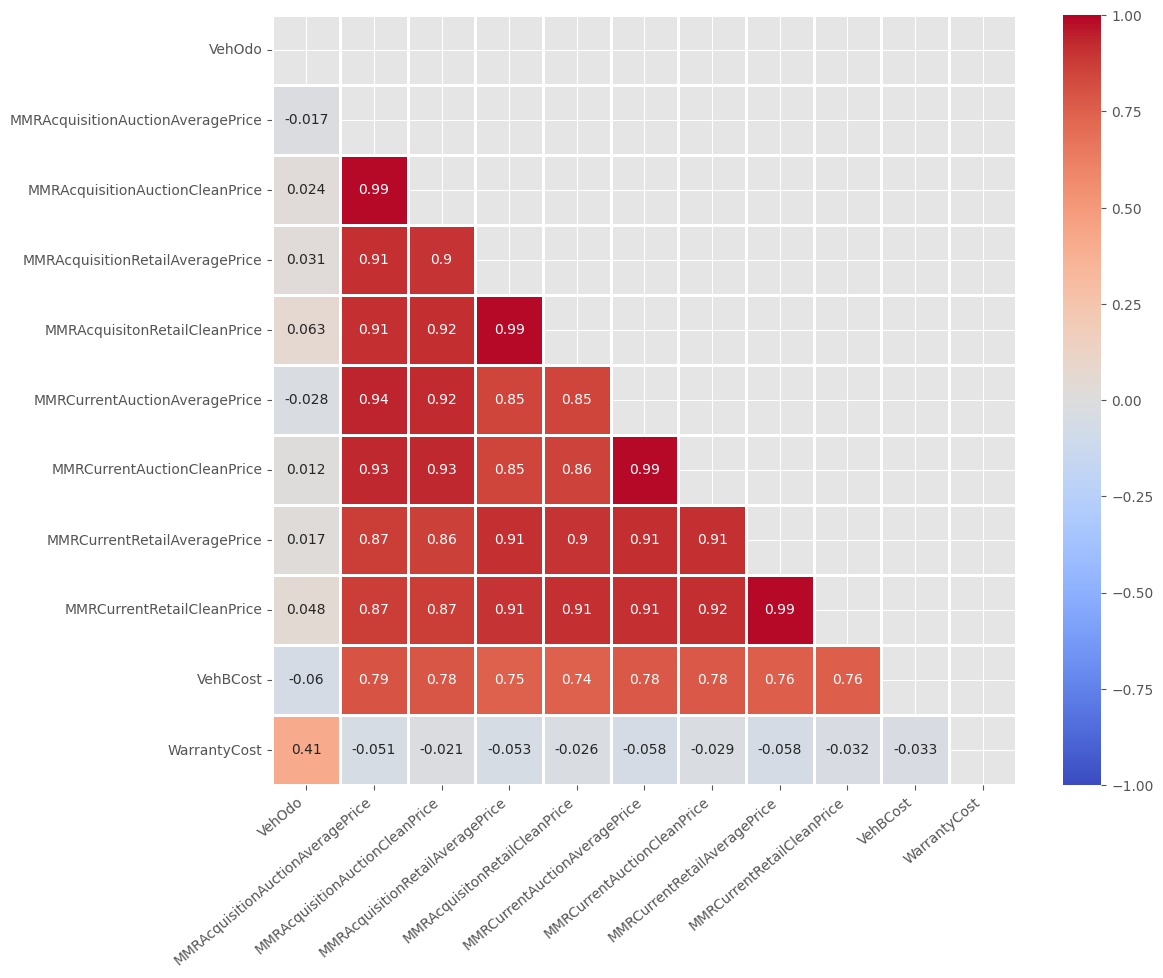

In [10]:
fig, ax = plt.subplots(figsize = [12,10])
# ---------------------------------------------

sns.heatmap(df.drop('IsBadBuy', axis = 1).corr(numeric_only=True),
            mask       = np.triu(df.drop('IsBadBuy', axis = 1).corr(numeric_only=True)),
            vmin       = -1, 
            vmax       = 1, 
            cmap       ='coolwarm', 
            annot      = True, 
            linewidths = 1,
            linecolor  = 'white')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

#### Discription od numerical features

In [11]:
# Descibe nummerical features of df
df.drop('IsBadBuy', axis = 1).describe(include = [np.number]).T     # or include = "number"

,count,mean,std,min,25%,50%,75%,max
VehOdo,65620.0,71505.930280,14582.977355,5368.0,61844.75,73378.5,82440.00,115717.0
MMRAcquisitionAuctionAveragePrice,65602.0,6127.143807,2456.965693,0.0,4273.00,6094.0,7765.00,35722.0
MMRAcquisitionAuctionCleanPrice,65602.0,7371.157236,2716.442814,0.0,5405.00,7303.0,9018.75,36859.0
MMRAcquisitionRetailAveragePrice,65602.0,8498.240770,3153.983067,0.0,6279.00,8447.0,10658.00,39080.0
MMRAcquisitonRetailCleanPrice,65602.0,9851.611003,3382.364048,0.0,7494.00,9792.0,12094.00,41482.0
MMRCurrentAuctionAveragePrice,65330.0,6131.694092,2430.506847,0.0,4275.00,6062.0,7735.00,35722.0
MMRCurrentAuctionCleanPrice,65330.0,7389.951768,2681.441548,0.0,5412.00,7314.0,9012.00,36859.0
MMRCurrentRetailAveragePrice,65330.0,8776.866019,3087.008256,0.0,6540.00,8736.0,10910.00,39080.0
MMRCurrentRetailCleanPrice,65330.0,10145.912582,3305.658577,0.0,7790.25,10103.0,12309.00,41062.0
VehBCost,65564.0,6727.464264,1759.011960,1.0,5435.00,6700.0,7900.00,38785.0


#### Boxplots/Histograms of the numerical features 

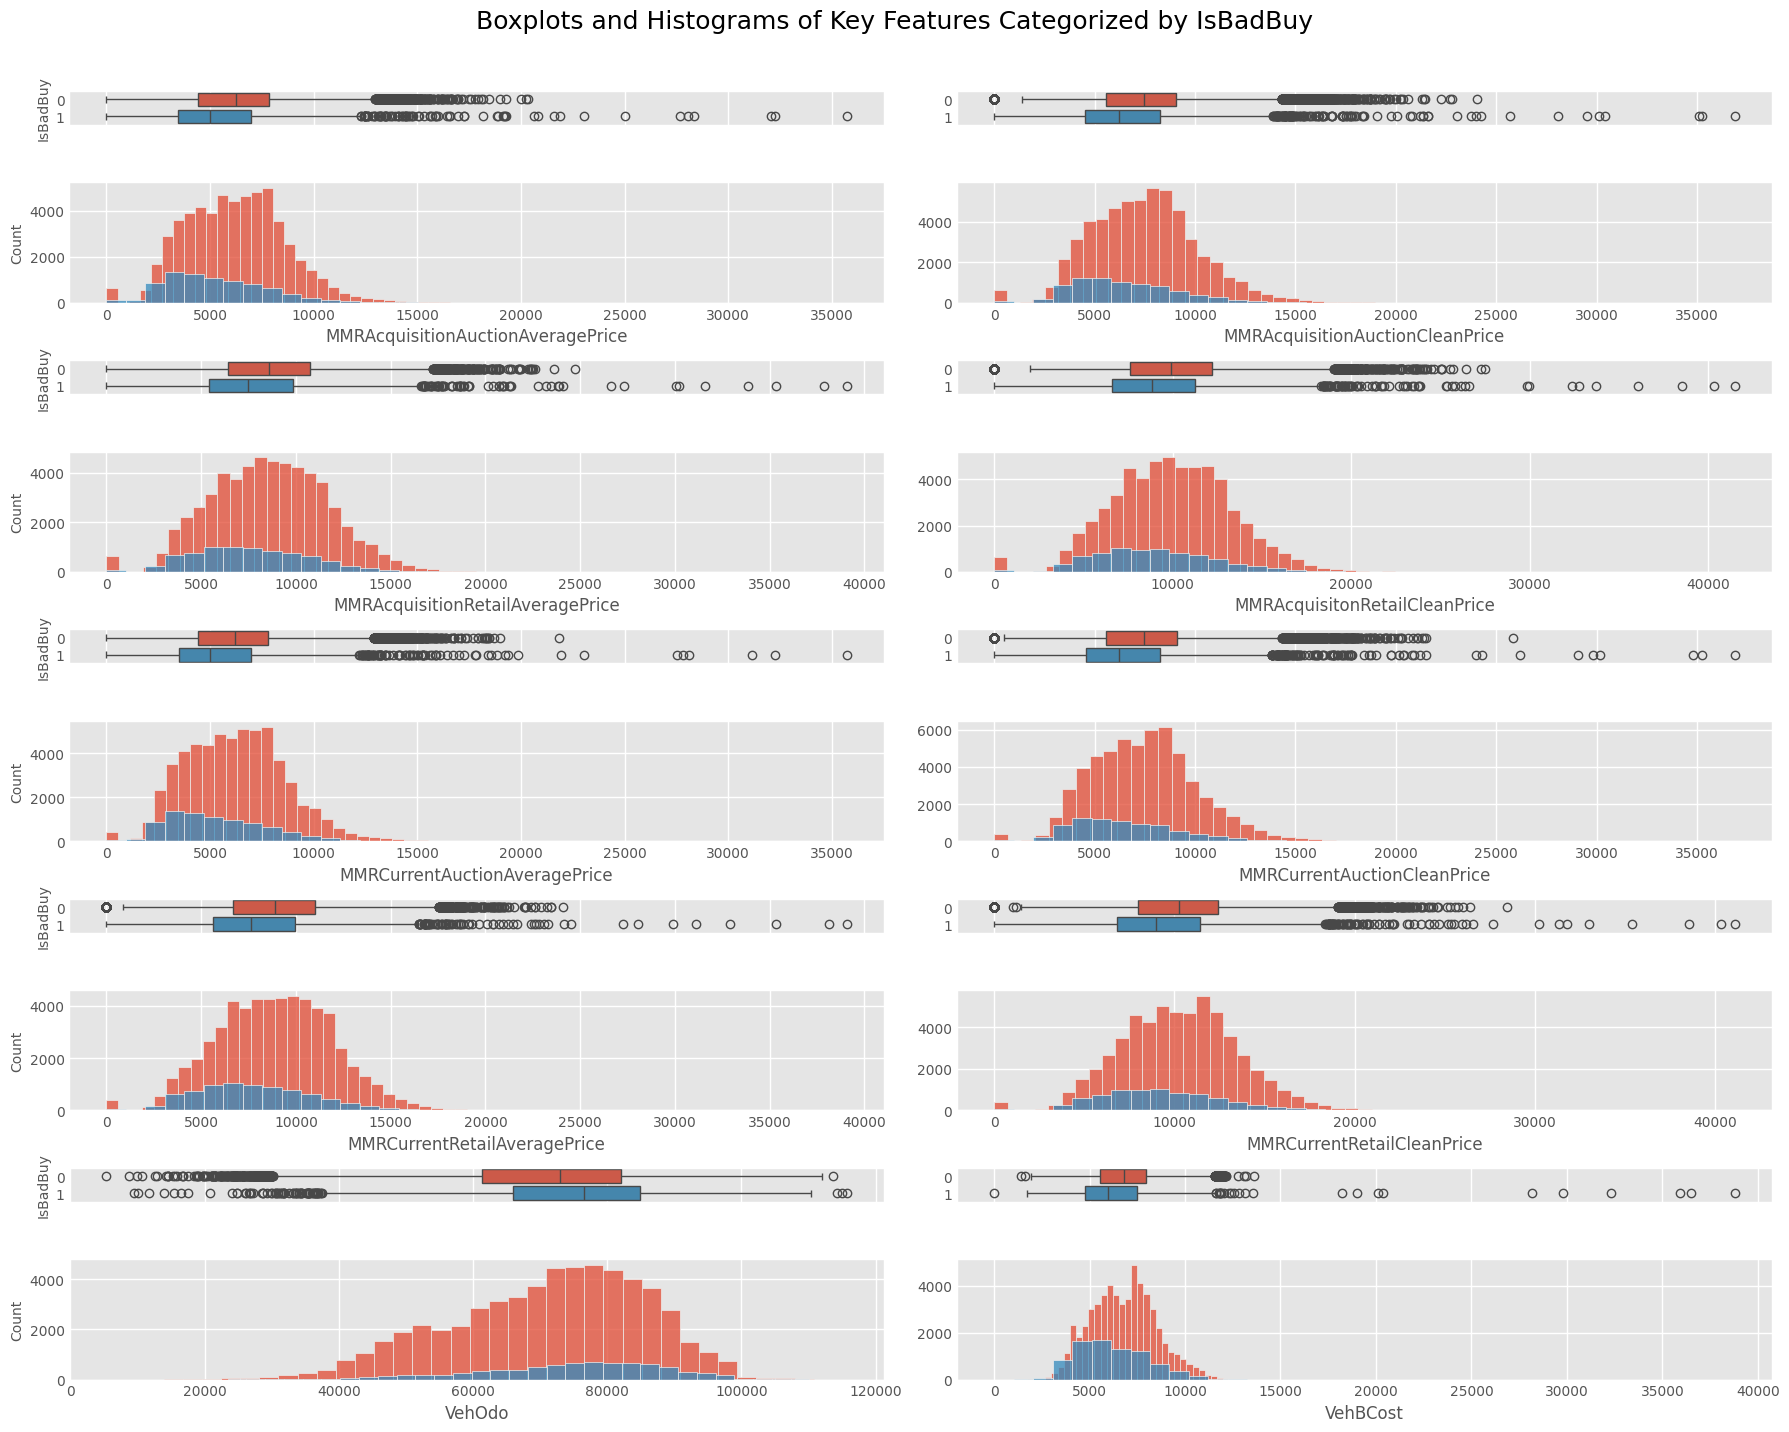

In [58]:
cols_1 = ['MMRAcquisitionAuctionAveragePrice', 
          'MMRAcquisitionRetailAveragePrice', 
          'MMRCurrentAuctionAveragePrice', 
          'MMRCurrentRetailAveragePrice', 
          'VehOdo']

cols_2 = ['MMRAcquisitionAuctionCleanPrice', 
          'MMRAcquisitonRetailCleanPrice', 
          'MMRCurrentAuctionCleanPrice',
          'MMRCurrentRetailCleanPrice', 
          'VehBCost']
# -------------------------------------------------------------------------------------------------------------------
bin = int(np.ceil(1 + 3.3* np.log(df.shape[0])))

fig, ax = plt.subplots(nrows       = 10, 
                       ncols       = 2, 
                       figsize     = (18,14), 
                       gridspec_kw = {"height_ratios": [0.22,0.78]*5}) 

fig.suptitle("Boxplots and Histograms of Key Features Categorized by IsBadBuy", y=1.02, fontsize=18)
# -------------------------------------------------------------------------------------------------------------------
for i, (col_1, col_2) in enumerate(zip(cols_1, cols_2)):                                  
    sns.boxplot(data  = df, y = 'IsBadBuy', x = col_1, ax = ax[i*2,0] , orient= 'h', legend=False, hue='IsBadBuy')#,palette="Set1")
    sns.histplot(data=df[df['IsBadBuy'] == 0][col_1], ax=ax[i*2+1, 0], bins=bin)  # , label='0', legend=True
    sns.histplot(data=df[df['IsBadBuy'] == 1][col_1], ax=ax[i*2+1, 0], bins=bin)  # , label='1', legend=True
    #sns.histplot(data = df_train[col_1], ax = ax[i*2+1,0], bins = bin, legend=False, hue = 'IsBadBuy')
                                   
    sns.boxplot(data  = df, y = 'IsBadBuy', x = col_2, ax = ax[i*2,1], orient= 'h', legend=False, hue='IsBadBuy')#,palette="Set1")
    sns.histplot(data=df[df['IsBadBuy'] == 0][col_2], ax=ax[i*2+1, 1], bins=bin)
    sns.histplot(data=df[df['IsBadBuy'] == 1][col_2], ax=ax[i*2+1, 1], bins=bin)
    # ------------------------------------------------------------------------------------------------------
    ax[i*2, 0].set_xlabel(" ")
    ax[i*2, 0].set_xticklabels([])
    ax[i*2, 1].set_xlabel(" ")
    ax[i*2, 1].set_xticklabels([]) 
    ax[i*2  ,1].set_ylabel('')
    ax[i*2+1,1].set_ylabel('')
    ax[i*2, 0].set_ylabel(ax[i*2, 0].get_ylabel(), fontsize=10)
    ax[i*2+1, 0].set_ylabel(ax[i*2+1, 0].get_ylabel(), fontsize=10)

plt.tight_layout()

## Data Cleaning

#### Missing Data

In [13]:
print('Number of missing values (NaNs) in each column', '\n', 20*'-- ')

# ----------------------------------------------- 
missing_values = df.isna().sum().to_frame(name = 'Missing_Values')
missing_values[missing_values['Missing_Values'] > 0]

Number of missing values (NaNs) in each column 
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


,Missing_Values
Trim,2098
SubModel,7
Color,7
Transmission,8
WheelTypeID,2873
WheelType,2877
Nationality,4
Size,4
TopThreeAmericanName,4
MMRAcquisitionAuctionAveragePrice,18


#### Trim to the first 2 digits only

In [14]:
# Trim to the first 2 digits only
df['VNZIP1'] = df['VNZIP1'].str[:2].astype('category')

#### Cleaning/filling 'PRIMEUNIT' and 'AUCGUART'

In [15]:
mask            = (~df['PRIMEUNIT'].isna() & ~df['AUCGUART'].isna())             # all combinations without NaNs
combinations_df = df.loc[mask, ['PRIMEUNIT', 'AUCGUART']].drop_duplicates()      # drop dublicates to observe unique combinations only

# -----------------------------------------------------------------------------------------------------------------------
print("All ['PRIMEUNIT', 'AUCGUART'] combinations")
print("Yellow is missing in 'AUCGUART' which is PRIMEUNIT --> NO")
print('-- ' * 30, '\n')
print(combinations_df.to_string(index=False))


All ['PRIMEUNIT', 'AUCGUART'] combinations
Yellow is missing in 'AUCGUART' which is PRIMEUNIT --> NO
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  

PRIMEUNIT AUCGUART
       NO    GREEN
       NO      RED
      YES    GREEN


In [16]:
## I am assuming that nan values are 'YELLOW' - guarantee unclear category, which reflected in PRIMEUNIT as NO

df['AUCGUART'].fillna(value  ='YELLOW', inplace = True)
df['PRIMEUNIT'].fillna(value = 'NO'   , inplace = True)
combinations_df = df.loc[:, ['PRIMEUNIT', 'AUCGUART']].drop_duplicates()
# ----------------------------------------------------------------------------
print("'Yellow' and 'NO' have been used to fill NaN values in both columns")
print(combinations_df.to_string(index=False))

'Yellow' and 'NO' have been used to fill NaN values in both columns
PRIMEUNIT AUCGUART
       NO   YELLOW
       NO    GREEN
       NO      RED
      YES    GREEN


#### Cleaning Nationality, Size, TopThreeAmericanName (4 NaNs each)


In [17]:
df[df.Nationality.isna()]

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
7909,0,2009-10-19,MANHEIM,2002,7,GMC,SIERRA 1500,SL,BASE,WHITE,AUTO,2.0,Covers,78288,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NO,YELLOW,16044,27,NC,7500.0,0,1455
18819,0,2009-10-23,MANHEIM,2006,3,HYUNDAI,ELANTRA 2.0L I4 MPI,GLS,4D SEDAN,SILVER,AUTO,2.0,Covers,45047,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NO,YELLOW,20234,89,NV,5705.0,0,482
28888,0,2010-02-17,ADESA,2008,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,SILVER,AUTO,2.0,Covers,63822,NaN,NaN,NaN,8715.0,9933.0,13105.0,14129.0,NaN,NaN,NaN,NaN,NO,YELLOW,21053,85,AZ,9655.0,0,825
34137,0,2010-02-24,ADESA,2008,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,BLACK,AUTO,2.0,Covers,61596,NaN,NaN,NaN,8759.0,9966.0,13397.0,14222.0,10159.0,11695.0,14026.0,15410.0,NO,YELLOW,21053,85,AZ,9955.0,0,825


In [18]:
# Defining masks for the 3 NaN cases

mask_GMC     = ((df['Make'] == 'GMC')     & (df['Model'] == 'SIERRA 1500')) 
mask_HYUNDAI = ((df['Make'] == 'HYUNDAI') & (df['Model'] == 'ELANTRA 2.0L I4 MPI'))
mask_JEEP    = ((df['Make'] == 'JEEP')    & (df['Model'] == 'PATRIOT 2WD 4C'))
     

In [19]:
print('Mask_1 Data to be dropped, The other 2 lines can be filled')
display(df.loc[mask_GMC, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_HYUNDAI, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_JEEP, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())

Mask_1 Data to be dropped, The other 2 lines can be filled


,Make,Model,Nationality,Size,TopThreeAmericanName
7909,GMC,SIERRA 1500,NaN,NaN,NaN


,Make,Model,Nationality,Size,TopThreeAmericanName
112,HYUNDAI,ELANTRA 2.0L I4 MPI,OTHER ASIAN,MEDIUM,OTHER
18819,HYUNDAI,ELANTRA 2.0L I4 MPI,NaN,NaN,NaN


,Make,Model,Nationality,Size,TopThreeAmericanName
650,JEEP,PATRIOT 2WD 4C,AMERICAN,SMALL SUV,CHRYSLER
28888,JEEP,PATRIOT 2WD 4C,NaN,NaN,NaN


In [20]:
## Filling NaNs with suitable values


df.loc[mask_JEEP, ['Nationality', 'Size', 'TopThreeAmericanName']] = \
df.loc[mask_JEEP, ['Nationality', 'Size', 'TopThreeAmericanName']] \
    .fillna({'Nationality'         : 'AMERICAN', 
             'Size'                : 'SMALL SUV', 
             'TopThreeAmericanName': 'CHRYSLER'}) #, inplace = True)
# --------------------------------------------------------------------------------

df.loc[mask_HYUNDAI, ['Nationality', 'Size', 'TopThreeAmericanName']] = \
df.loc[mask_HYUNDAI, ['Nationality', 'Size', 'TopThreeAmericanName']] \
    .fillna({'Nationality'         : 'OTHER ASIAN', 
             'Size'                : 'MEDIUM', 
             'TopThreeAmericanName': 'OTHER'}) #, inplace = True)

In [21]:
df[df.Nationality.isna()]

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
7909,0,2009-10-19,MANHEIM,2002,7,GMC,SIERRA 1500,SL,BASE,WHITE,AUTO,2.0,Covers,78288,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NO,YELLOW,16044,27,NC,7500.0,0,1455


In [22]:
# Test the previous code 
display(df.loc[mask_GMC, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_HYUNDAI, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())
display(df.loc[mask_JEEP, ['Make','Model','Nationality','Size' ,'TopThreeAmericanName']].drop_duplicates())

,Make,Model,Nationality,Size,TopThreeAmericanName
7909,GMC,SIERRA 1500,NaN,NaN,NaN


,Make,Model,Nationality,Size,TopThreeAmericanName
112,HYUNDAI,ELANTRA 2.0L I4 MPI,OTHER ASIAN,MEDIUM,OTHER


,Make,Model,Nationality,Size,TopThreeAmericanName
650,JEEP,PATRIOT 2WD 4C,AMERICAN,SMALL SUV,CHRYSLER


In [23]:
# 'Transmission' feature need to be cleaned
df['Transmission'].value_counts()

Transmission
AUTO      63288
MANUAL     2323
Manual        1
Name: count, dtype: int64

In [24]:
df.loc[df['Transmission'] == 'Manual', 'Transmission'] = 'MANUAL'
df['Transmission'].value_counts()

Transmission
AUTO      63288
MANUAL     2324
Name: count, dtype: int64

In [25]:

categorical_col = df.select_dtypes(include=['object', 'category'])

print("Categorical unique count and values\n", '-- '*30)
pd.DataFrame({
              'NaN Count'    : categorical_col.isna().sum(),
              'Unique Count' : categorical_col.nunique(),
              'Column Unique': categorical_col.apply(lambda col: col.unique().tolist())
            })


Categorical unique count and values
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


,NaN Count,Unique Count,Column Unique
Auction,0,3,"[OTHER, ADESA, MANHEIM]"
VehYear,0,10,"[2007, 2005, 2006, 2004, 2002, 2003, 2008, 2009, 2001, 2010]"
VehicleAge,0,10,"[2, 4, 5, 3, 6, 7, 8, 1, 9, 0]"
Make,0,29,"[KIA, SUZUKI, CHEVROLET, CHRYSLER, NISSAN, MITSUBISHI, DODGE, PONTIAC, HONDA, FORD, MERCURY, SATURN, GMC, MAZDA, JEEP, HYUNDAI, BUICK, SCION, OLDSMOBILE, TOYOTA, INFINITI, ISUZU, MINI, LINCOLN, VOLVO, VOLKSWAGEN, SUBARU, ACURA, LEXUS]"
Model,0,1029,"[SPECTRA, FORENZA 2.0L I4 EFI, COBALT, VENTURE FWD V6 3.4L, TOWN & COUNTRY 2WD V, XTERRA 2WD V6 3.3L V, GALANT 4C 2.4L I4 EF, CHARGER 3.5L V6 EFI, COLORADO PICKUP 2WD, GRAND AM V6, MALIBU V6 3.5L V6 SF, MALIBU 4C, ACCORD 4C, TRAILBLAZER 4WD 6C 4, IMPALA, FOCUS, ALTIMA 2.5L I4 MPI /, STRATUS 4C, 1500 RAM PICKUP 2WD, 300 2.7L V6 MPI, MALIBU 4C 2.2L I4 MP, SPECTRA 2.0L I4 EFI, SPECTRA 2.0L I-4 EFI, SORENTO 2WD, CARAVAN GRAND FWD V6, STRATUS V6 2.7L V6 M, CR-V 2WD, MILAN 4C, GRAND AM 4C 2.2L I4, ION, PT CRUISER, GRAND PRIX 3.8L V6 S, FRONTIER PICKUP 2WD, EQUINOX AWD V6 3.4L, AVEO, FOCUS 2.0L I4 SFI, PACIFICA AWD 4.0L V6, FIVE HUNDRED, AVENGER 4C, MARINER 4WD V6 3.0L, TRAILBLAZER 2WD 6C, RIO, GRAND PRIX, TAURUS, IMPALA 3.5L V6 SFI, CHARGER V6 2.7L V6 M, MUSTANG V6 4.0L V6 E, 1500 SIERRA PICKUP 4, ENVOY 2WD 6C 4.2L I-, RENO 2.0L I4 EFI, TRAILBLAZER EXT 4WD, CHARGER 2.7L V6 MPI, 1500 SIERRA PICKUP 2, PT CRUISER 2.4L I4 S, FORENZA, MAXIMA 3.5L V6 MPI, B3000 PICKUP 2WD V6, CARAVAN FWD V6, FREESTAR FWD V6 3.9L, G6 4C, PACIFICA FWD, TOWN & COUNTRY FWD V, IMPALA V6, EQUINOX FWD V6 3.4L, ACCORD 4C 2.4L I-4 M, AURA V6, FIVE HUNDRED 3.0L V6, CALIBER, NEON, MOUNTAINEER AWD V6, MAZDA6, VUE 2WD 4C, TRAILBLAZER 4WD 6C, EXPLORER 4WD V6, HHR 2.4L I-4 MPI, TAURUS 3.0L V6 EFI, ION 2.2L I4 EFI, PATRIOT FWD 4C, SONATA 4C, SONATA V6, STRATUS 4C 2.4L I4 S, G6 V6, ELANTRA 2.0L I4 MPI, ESCAPE 2WD 4C, ELANTRA, AVENGER V6, SORENTO 2WD 3.5L V6, CENTURY V6, CARAVAN FWD V6 3.3L, TRAILBLAZER 2WD 6C 4, LUCERNE V6 3.8L V6 S, ESCORT 2.0L I-4 EFI, STRATUS V6, SEBRING 4C 2.4L I4 S, XA, ELEMENT 4WD 2.4L I4, SEBRING V6, CHARGER V6, SEBRING 4C 2.4L I4 E, ION 2.2L I4 EFI / SF, ...]"
Trim,2098,134,"[nan, EX, LT, LS, Bas, SE, DE, LX, SXT, SLT, SX, 2, Tou, ZX4, SEL, GT, Cla, SL, SLE, Spo, W/T, ZX5, Lim, DS, XE, i, XLT, 3, GLS, Cus, CX, ZX2, GL, Nor, Lar, SES, S, ES, 1, STX, ST, Edg, SL2, Adv, SC1, Lux, L20, ZX3, LE, 150, s, XLS, Edd, XL, CXL, GS, L30, GTC, Sta, LXi, SVT, Sig, T5, CE, SV6, LW2, Pre, VP, Ren, GXE, ZTS, OZ, SS, C, SL1, R/T, GTP, Her, Hig, FX4, Ent, Z71, LL, Hyb, RS, SR5, LTZ, Den, ZXW, Pro, Plu, Val, Max, LW3, X, Car, RT, Ult, DX, GLE, ...]"
SubModel,7,840,"[4D SEDAN EX, 4D WAGON, 2D COUPE LT, PASSENGER 3.4L, MINIVAN 3.3L, 4D SPORT UTILITY, 4D SEDAN DE, 4D SEDAN, CREW CAB 2.8L, 4D SEDAN SE1, 4D SEDAN LS, 4D SEDAN LT, 4D SEDAN LX AUTO, 4D SUV 4.2L LS, 4D SEDAN SE, QUAD CAB 4.7L FFV SLT, 4D SPORT UTILITY EX, 4D SEDAN SXT FFV, 4D SPORT UTILITY LX, 4D SEDAN LEVEL 2, EXT CAB 2.4L XE, 4D SUV LT, 4D SEDAN ZX4, 4D SPORT TOURING, 4D SEDAN SEL, 4D SEDAN S, 4D SEDAN GT, 4D SUV 3.0L PREMIER, 4D SUV 4.2L, 4D SEDAN CLASSIC, 4D SEDAN EX AUTO, 4D SEDAN 2.7L, 2D COUPE, EXT CAB 5.3L SL, 4D UTILITY 4.2L SLE, EXT MINIVAN 3.3L LX, MINIVAN 3.3L FFV SPORT, REG CAB 4.3L SLE, 4D HATCHBACK ZX5 SE, 4D SEDAN SL, 4D SEDAN LIMITED, 2D EXT CAB 3.0L DUAL SPORT FFV, MINIVAN 3.3L FFV SXT, PASSENGER 3.9L SE, 4D SPORT TOURER, MINIVAN 3.8L, 4D SEDAN LS 3.5L FFV, 4D SUV LS, 4D SEDAN XE, 4D WAGON SXT, 4D SUV 4.0L, 4D SEDAN I, 4D CUV 2.2L, 4D SUV 4.0L FFV XLT, REG CAB 3.5L LS, 4D SUV 2.2L 1LT, 4D SEDAN LEVEL 3, 4D SUV SPORT, 4D SEDAN GLS, 4D SPORT, 4D SEDAN LT 3.5L, 4D CUV 3.0L XLT, 4D SEDAN CUSTOM, 4D SEDAN CX, 2D COUPE ZX2, 4D HATCHBACK, 4D SEDAN 3.5L, REG CAB 5.3L, 4D SEDAN GL2, CREW CAB 5.4L LARIAT, MINIVAN 3.3L SPORT, 4D WAGON LAREDO, 4D SEDAN SES, PASSENGER EXT 3.5L, 4D CUV 2.7L GLS, 4D SEDAN 1.8, 4D SPORT UTILITY I, 4D SPORT UTILITY SE, 4D SUV 5.4L XLT, 4D PASSENGER 3.8L SE, REG CAB 3.7L SXT, 4D SEDAN LT 3.9L, 4D SEDAN LEVEL 1, EXT CAB 4.

#### combinations of ['WheelTypeID','WheelType'], Type_0 to be introduced

In [26]:
## All possible combinations of ['WheelTypeID','WheelType']   --> finding redundant columns/features or info
df.loc[:, ['WheelTypeID','WheelType']].drop_duplicates()

,WheelTypeID,WheelType
0,1.0,Alloy
1,2.0,Covers
13,NaN,NaN
23,3.0,Special
14451,0.0,NaN


In [27]:
# Replace 'NaN' with 'Type_0' when 'WheelTypeID' is 0.0
df.loc[(df['WheelTypeID'] == 0.0) & (df['WheelType'].isna()), 'WheelType'] = 'Type_0'

# Verify the changes
print('WheelType --> Type_0, whenever WheelTypeID is 0.0\n')
df.loc[:, ['WheelTypeID', 'WheelType']].drop_duplicates()

WheelType --> Type_0, whenever WheelTypeID is 0.0



,WheelTypeID,WheelType
0,1.0,Alloy
1,2.0,Covers
13,NaN,NaN
23,3.0,Special
14451,0.0,Type_0


#### All possible combinations of ['VehYear','VehicleAge']

In [28]:
## All possible combinations of ['VehYear','VehicleAge']   --> finding redundant columns/features or info
df.loc[:, ['VehYear','VehicleAge']].drop_duplicates().sort_values(by = 'VehYear').style.hide()     # used to be hide_index()



VehYear,VehicleAge
2001,8
2001,9
2002,7
2002,8
2003,7
2003,6
2004,5
2004,6
2005,4
2005,5


#### Converting Object feature type to category

In [29]:
# Around 50% memory reduction 
mask     = df.select_dtypes(include='object').columns
df[mask] = df[mask].astype('category')
# --------------------------------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  category      
 3   VehYear                            65620 non-null  category      
 4   VehicleAge                         65620 non-null  category      
 5   Make                               65620 non-null  category      
 6   Model                              65620 non-null  category      
 7   Trim                               63522 non-null  category      
 8   SubModel                           65613 non-null  category      
 9   Color                              65613 non-null  category      
 10  Transmission                      

#### Read Dataframe, using CLEAN_ALL_DATA funbction

In [30]:
from Functions import CLEAN_All_DATA
# --------- Read the Data ---------------

df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

In [31]:
print(f'The shape of df is     : {df.shape}')                                 
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is : {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is : {y_test.shape}')

The shape of df is     : (65620, 33)
The shape of X_train is: (59058, 33)
The shape of X_test is : (6562, 33)
The shape of y_train is: (59058,)
The shape of y_test is : (6562,)


In [32]:
X_train.head(2)

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchDate_year,PurchDate_month,PurchDate_dayofweek
21430,OTHER,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,GREEN,AUTO,Covers,71041,AMERICAN,VAN,GM,3924.0,5038.0,4738.0,5941.0,3504.0,5047.0,4284.0,5951.0,NO,YELLOW,99750,39,MS,4700.0,0,4622,2009,6,3
53433,OTHER,2007,2,KIA,RIO 1.6L I4 MPI,Bas,4D SEDAN,SILVER,AUTO,Covers,63941,OTHER ASIAN,COMPACT,OTHER,4166.0,5190.0,4999.0,6105.0,4062.0,4898.0,4887.0,5790.0,NO,YELLOW,3453,80,CO,5255.0,0,533,2009,9,3


#### Introducing df_train, cleaned training section from origianl dataframe

#### Adding the extra cluster feature created with k-means

In [33]:
# df_train is to be used in function: categorical_distribution in the next step
y_train_copy                                       = y_train.rename("IsBadBuy")
X_train_copy, X_test_copy, X_aim_copy, cat_cols_FE = Kmeans_FE_C(X_train, X_test, X_aim, cat_cols, n_clusters = 8)
# Concatenate X_train with y_train along the columns (axis=1)
df_train = pd.concat([X_train_copy, y_train_copy], axis=1)

#### Distribution of categorical features of X_train over target 

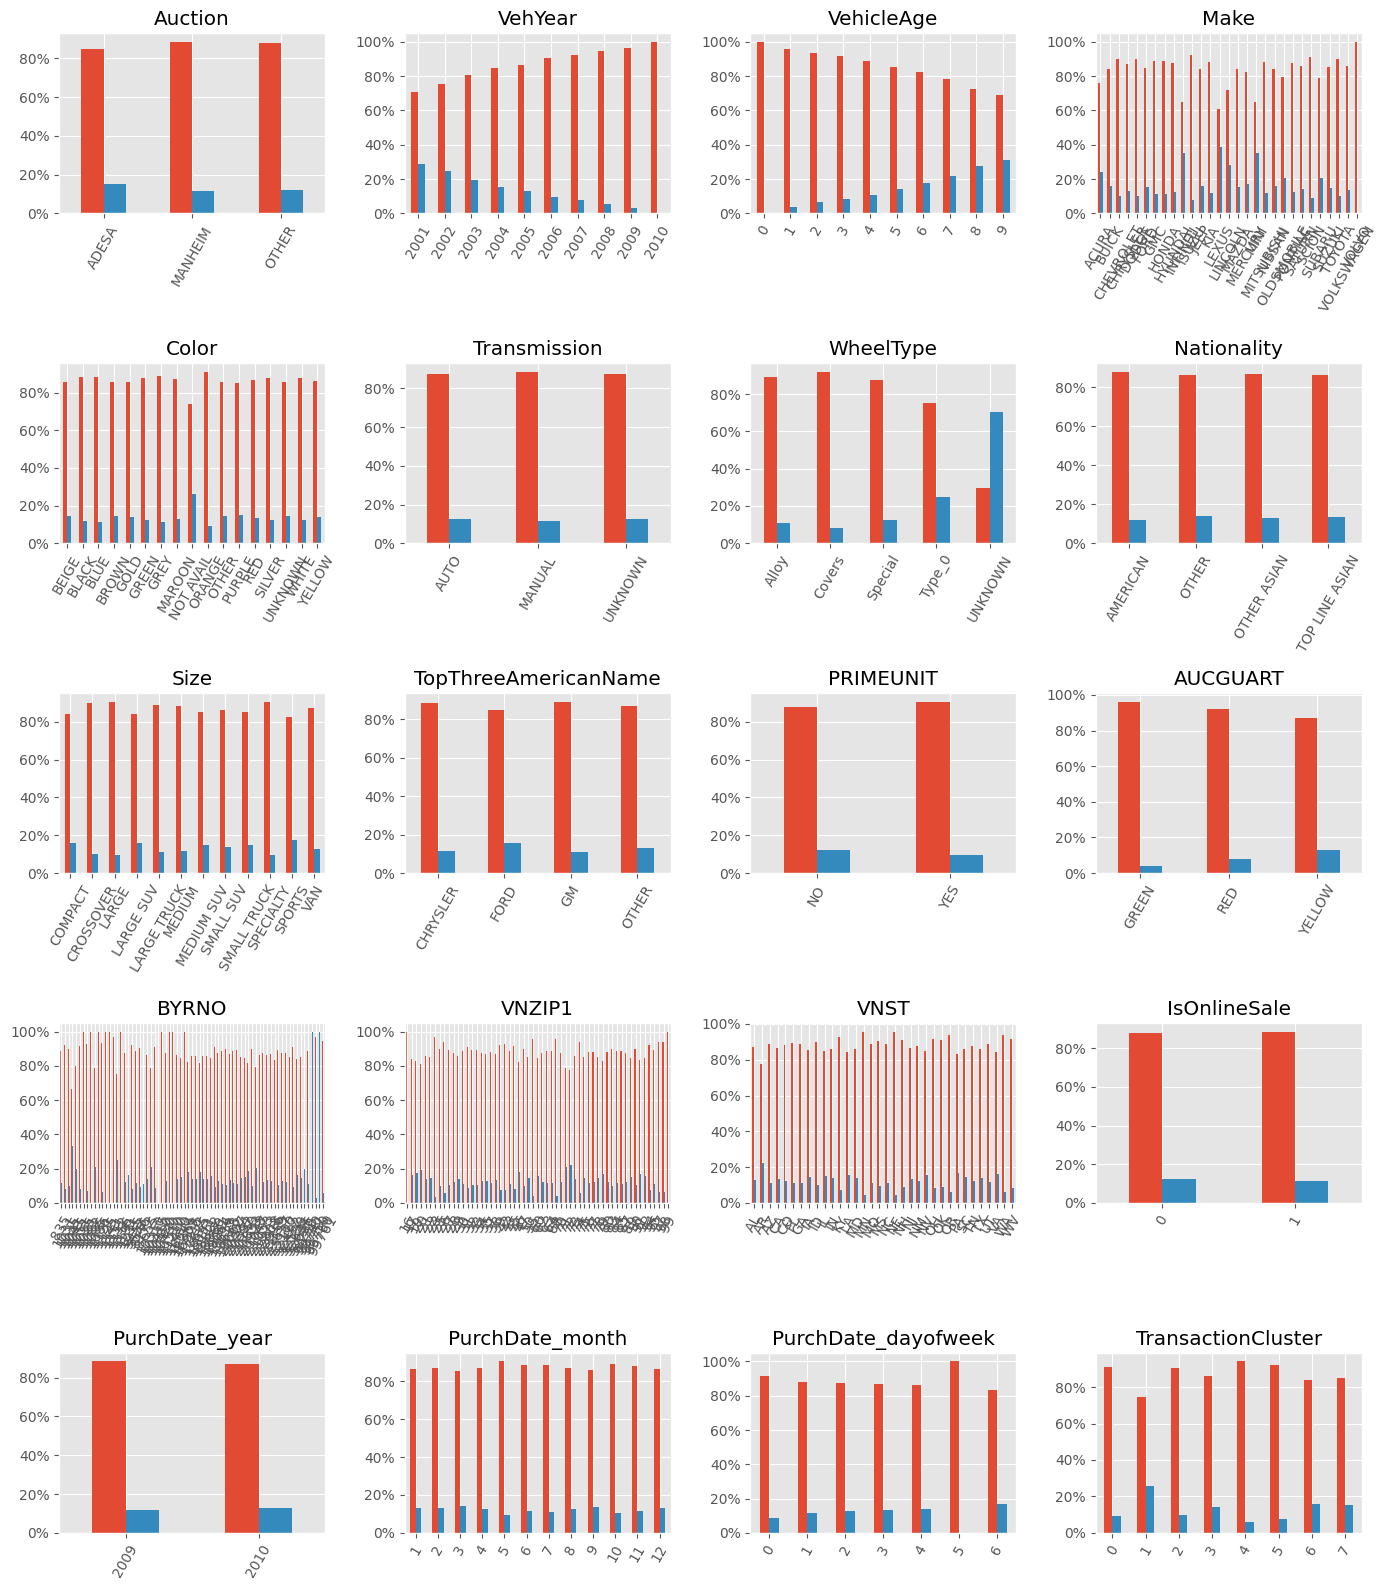

In [34]:
# Result of Categorical Features shows a promising 'WheelType', 'YehYear', 'VehicleAge'
# The otrher features do not show enough variance

categorical_distribution(df_train, 4, 71, (14,16))

In [52]:
df_train['IsBadBuy'] = df_train['IsBadBuy'].astype('category')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59058 entries, 21430 to 15795
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Auction                            59058 non-null  category
 1   VehYear                            59058 non-null  category
 2   VehicleAge                         59058 non-null  category
 3   Make                               59058 non-null  category
 4   Model                              59058 non-null  category
 5   Trim                               59058 non-null  category
 6   SubModel                           59058 non-null  category
 7   Color                              59058 non-null  category
 8   Transmission                       59058 non-null  category
 9   WheelType                          59058 non-null  category
 10  VehOdo                             59058 non-null  int64   
 11  Nationality                        59058 n

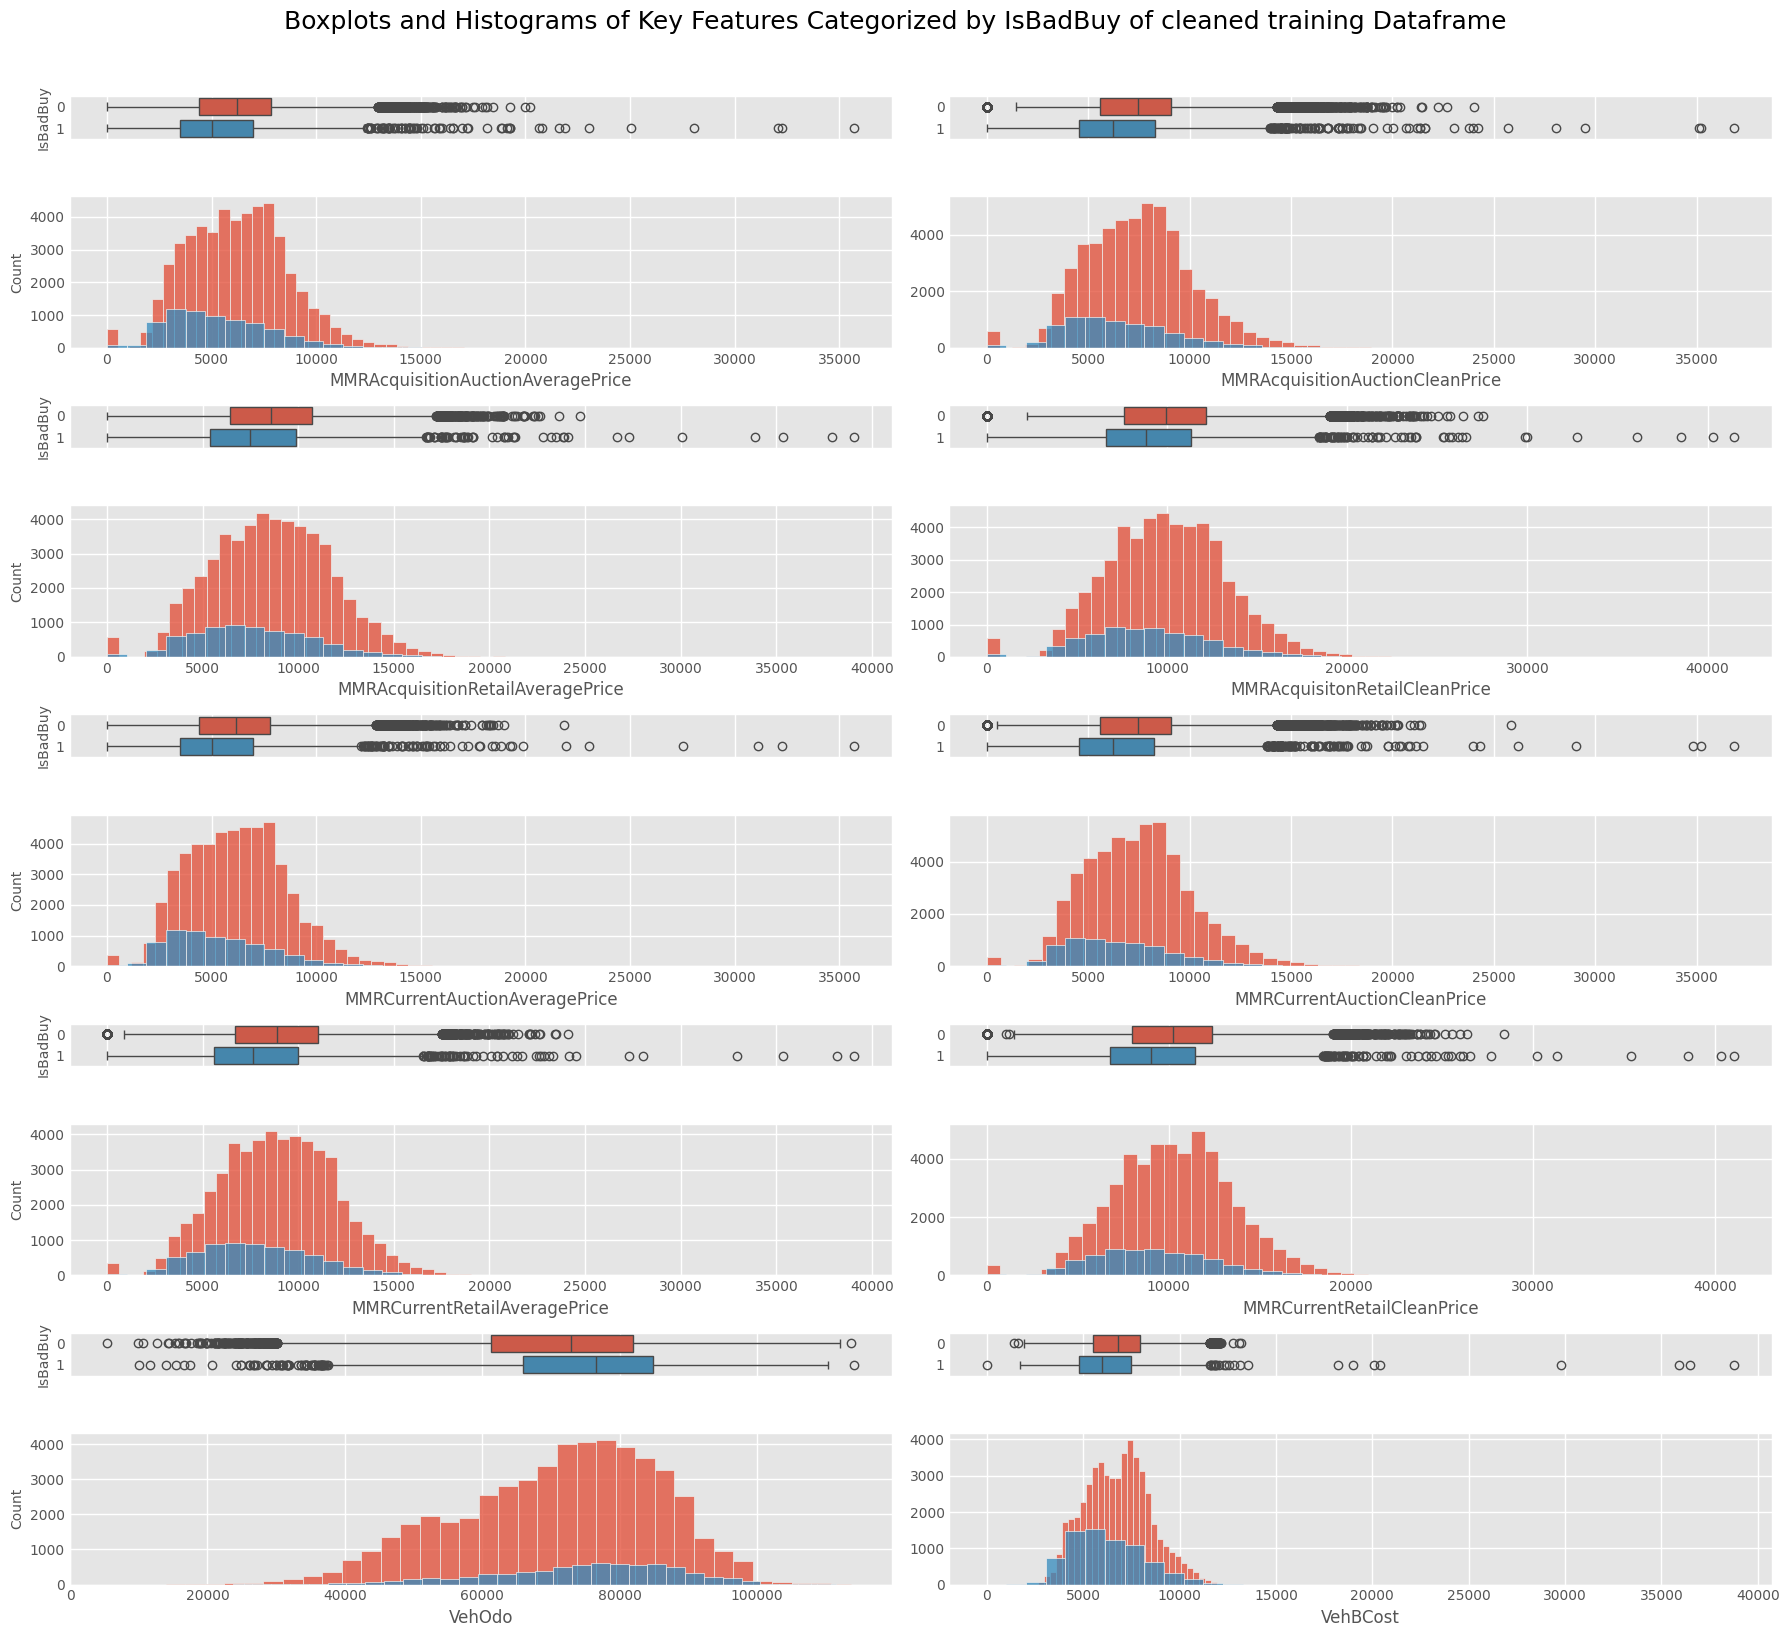

In [63]:

cols_1 = ['MMRAcquisitionAuctionAveragePrice', 
          'MMRAcquisitionRetailAveragePrice', 
          'MMRCurrentAuctionAveragePrice', 
          'MMRCurrentRetailAveragePrice', 
          'VehOdo']

cols_2 = ['MMRAcquisitionAuctionCleanPrice', 
          'MMRAcquisitonRetailCleanPrice', 
          'MMRCurrentAuctionCleanPrice',
          'MMRCurrentRetailCleanPrice', 
          'VehBCost']
# -------------------------------------------------------------------------------------------------------------------
bin = int(np.ceil(1 + 3.3* np.log(df_train.shape[0])))

fig, ax = plt.subplots(nrows       = 10, 
                       ncols       = 2, 
                       figsize     = (18,16), 
                       gridspec_kw = {"height_ratios": [0.22,0.78]*5}) 

fig.suptitle("Boxplots and Histograms of Key Features Categorized by IsBadBuy of cleaned training Dataframe", y=1.02, fontsize=18)
# -------------------------------------------------------------------------------------------------------------------
for i, (col_1, col_2) in enumerate(zip(cols_1, cols_2)):                                  
    sns.boxplot(data  = df_train, y = 'IsBadBuy', x = col_1, ax = ax[i*2,0]  , orient= 'h', legend=False, hue='IsBadBuy')#,palette="Set1")
    sns.histplot(data=df_train[df_train['IsBadBuy'] == 0][col_1], ax=ax[i*2+1, 0], bins=bin)  # , label='0', legend=True
    sns.histplot(data=df_train[df_train['IsBadBuy'] == 1][col_1], ax=ax[i*2+1, 0], bins=bin)  # , label='1', legend=True
    #sns.histplot(data = df_train[col_1], ax = ax[i*2+1,0], bins = bin, legend=False, hue = 'IsBadBuy')
                                   
    sns.boxplot(data  = df_train, y = 'IsBadBuy', x = col_2, ax = ax[i*2,1], orient= 'h', legend=False, hue='IsBadBuy')#,palette="Set1")
    sns.histplot(data=df_train[df_train['IsBadBuy'] == 0][col_2], ax=ax[i*2+1, 1], bins=bin)
    sns.histplot(data=df_train[df_train['IsBadBuy'] == 1][col_2], ax=ax[i*2+1, 1], bins=bin)
    # ------------------------------------------------------------------------------------------------------
    ax[i*2, 0].set_xlabel(" ")
    ax[i*2, 0].set_xticklabels([])
    ax[i*2, 1].set_xlabel(" ")
    ax[i*2, 1].set_xticklabels([]) 
    ax[i*2  ,1].set_ylabel('')
    ax[i*2+1,1].set_ylabel('')
    ax[i*2, 0].set_ylabel(ax[i*2, 0].get_ylabel(), fontsize=10)
    ax[i*2+1, 0].set_ylabel(ax[i*2+1, 0].get_ylabel(), fontsize=10)

plt.tight_layout()